<a href="https://colab.research.google.com/github/ANKITPANT1999/machine-learning-capstone-projects./blob/main/Copy_of_MLmidcourse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project name-open-ended ML Case Study

Submitted by-ankit pant

# Problem Statement
Imagine yourself as a freelance data scientist ready for the next project adventure. Your task is to select a machine learning project from the list provided or propose an original project idea that resonates with you. Your objective is to identify a specific challenge within the chosen industry domain and design a machine-learning solution to address it. Whether you're predicting customer behavior, optimizing processes, or making healthcare more efficient, your project should demonstrate your ability to approach complex problems, preprocess and analyze relevant data, develop and fine-tune models, and interpret results in a meaningful way. Your project will be a testament to your adaptability, curiosity, and aptitude for machine learning.

# About the data set
Telecom (telecommunications) industry deals with providing communication services over long distances using various mediums such as wired or wireless technology.
Major services include mobile telephony, landline telephony, internet services (both broadband and mobile data), and television broadcasting.

Churn is a significant concern in the telecom industry. It refers to customers discontinuing their services with a particular provider and switching to another provider.

The problem falls under the realm of supervised learning.

# Constraints & Limitations
Telecommunication data can be highly complex and heterogeneous, containing structured (e.g., customer demographics, call records) and unstructured data (e.g., customer feedback, social media interactions).
Customer churn in the telecom industry can be influenced by various factors such as network quality, pricing strategies, customer service, and competitive offerings.
Predicting churn accurately requires a comprehensive understanding of customer behavior and preferences, which may be challenging to capture solely from telecom data.
Customer churn prediction models may need to account for seasonality, market dynamics, and external factors (e.g., economic conditions, technological advancements).

# GETTING STARTED WITH PROJECT
STEPS TO BE PERFORMED I THIS PARTICULAR CASE STUDY

1-Data Preprocessing

2-Exploratory Data Analysis (EDA)

3- Model Selection, Training & Evaluation

# DATA PREPROCESSING and EDA

In [1]:
#importing useful libraries for eda
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN


In [2]:
#importing the data sheet
telco_churn_data = pd.read_csv('telechurn predection.csv')

In [3]:
#getting first 5 rows and columns
telco_churn_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#attribute of datasheet
telco_churn_data.shape

(7043, 21)

In [5]:
telco_churn_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
telco_churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
telco_churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
telco_churn_data.duplicated().sum()


0

In [9]:
telco_churn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
for i in telco_churn_data.columns.values:
  print("no of unique value in",i,"is",telco_churn_data[i].nunique())

no of unique value in customerID is 7043
no of unique value in gender is 2
no of unique value in SeniorCitizen is 2
no of unique value in Partner is 2
no of unique value in Dependents is 2
no of unique value in tenure is 73
no of unique value in PhoneService is 2
no of unique value in MultipleLines is 3
no of unique value in InternetService is 3
no of unique value in OnlineSecurity is 3
no of unique value in OnlineBackup is 3
no of unique value in DeviceProtection is 3
no of unique value in TechSupport is 3
no of unique value in StreamingTV is 3
no of unique value in StreamingMovies is 3
no of unique value in Contract is 3
no of unique value in PaperlessBilling is 2
no of unique value in PaymentMethod is 4
no of unique value in MonthlyCharges is 1585
no of unique value in TotalCharges is 6531
no of unique value in Churn is 2


There no duplicates no null vlues in the data set but we do need to change the data type of some column

In [11]:
#CLEANING THE DATA
#Total Charges should be numeric amount. Let's convert it to numerical data type
telco_churn_data.TotalCharges = pd.to_numeric(telco_churn_data.TotalCharges, errors='coerce')

In [12]:
telco_churn_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

now we have total 11 missing value in column total charge

In [13]:
#since the missing value is veruy low we can just ignore and drop them
telco_churn_data.dropna(how = 'any', inplace = True)

In [14]:
print(telco_churn_data['tenure'].max())
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

telco_churn_data['tenure_group'] = pd.cut(telco_churn_data.tenure, range(1, 80, 12), right=False, labels=labels)

72


In [15]:
telco_churn_data['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [16]:
#now we cn also remove the columns not needed for further process
telco_churn_data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
telco_churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


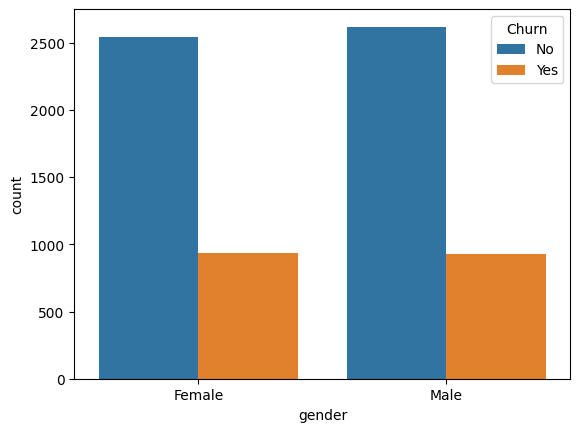

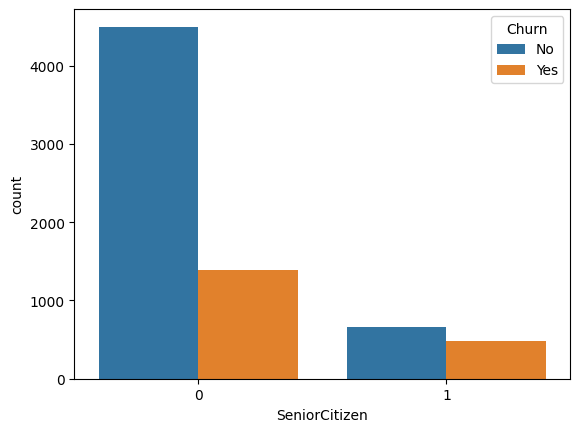

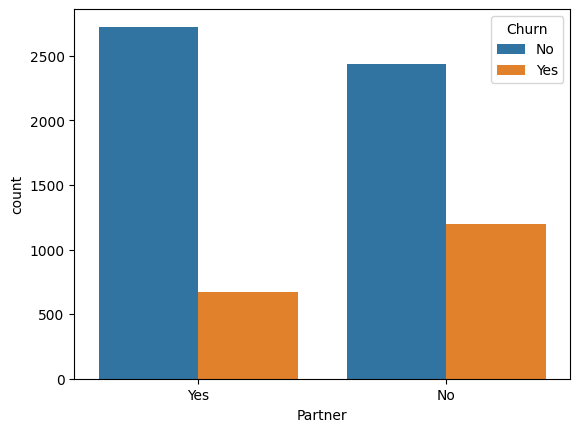

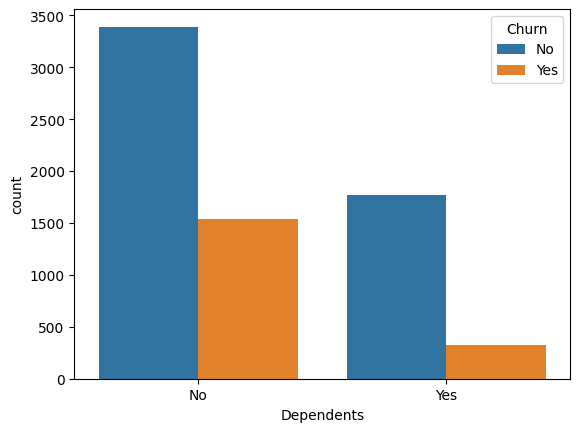

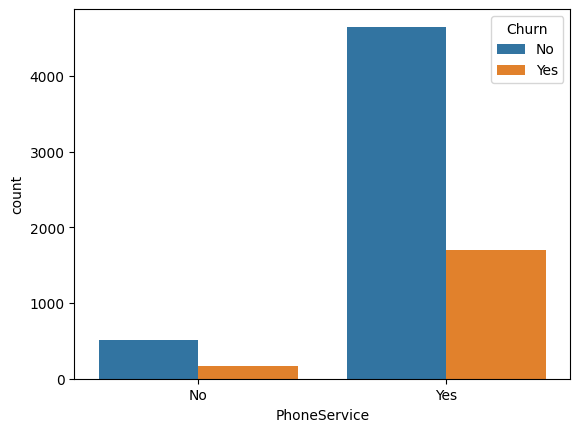

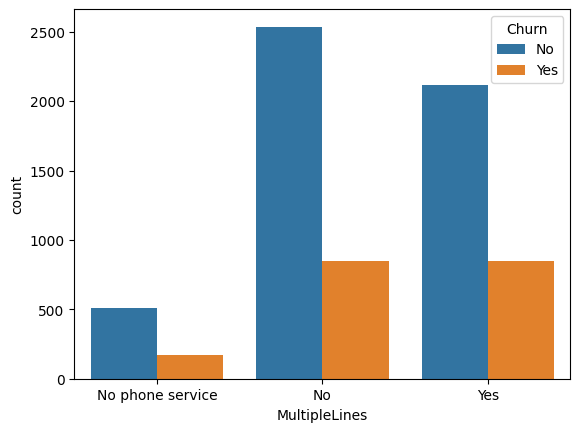

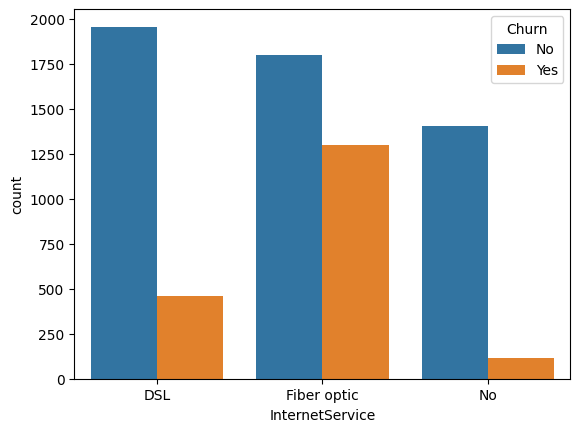

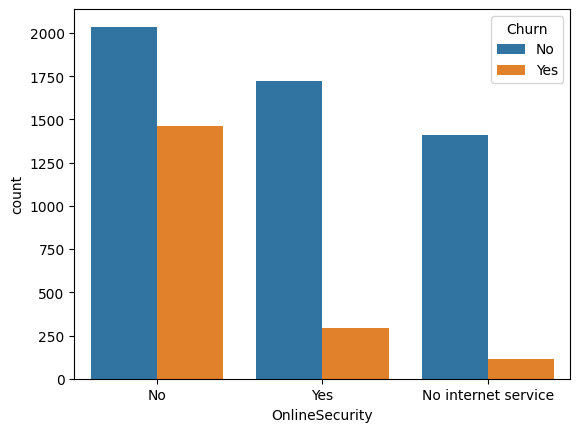

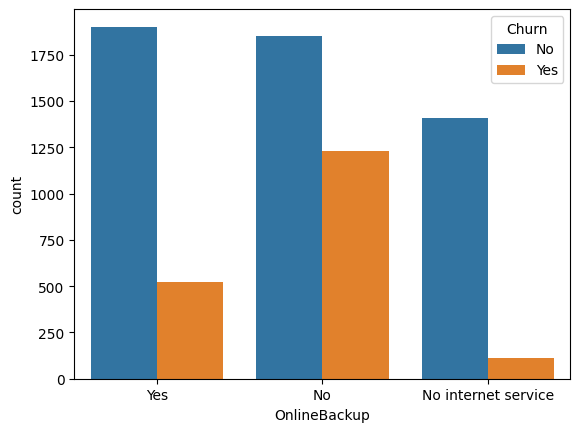

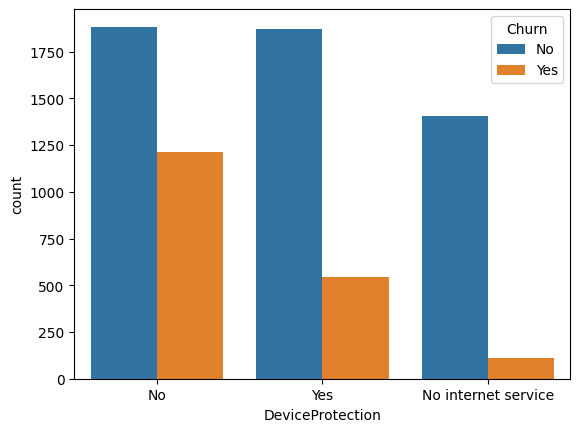

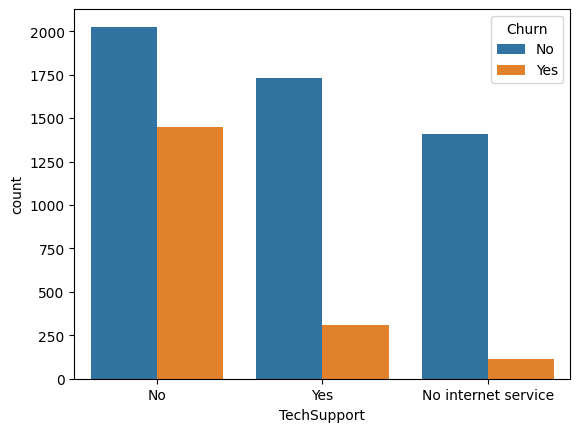

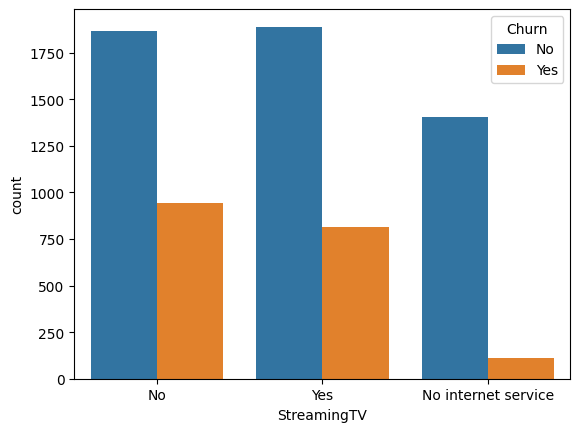

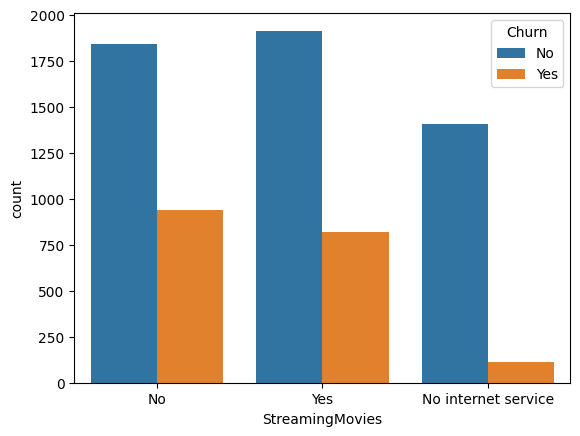

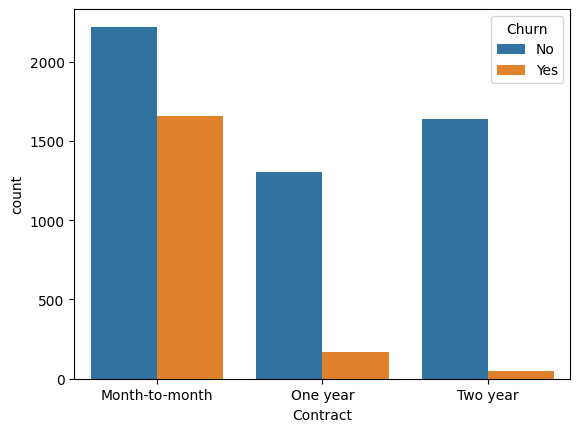

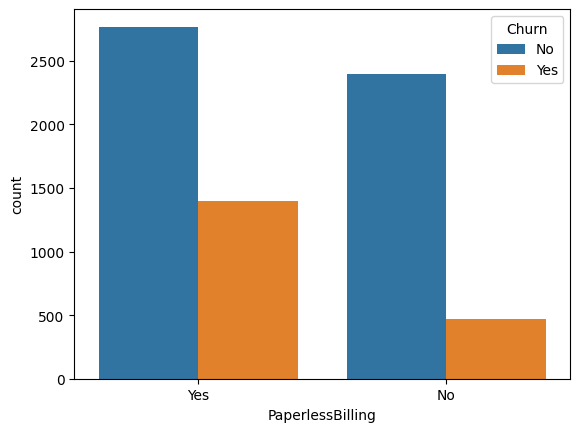

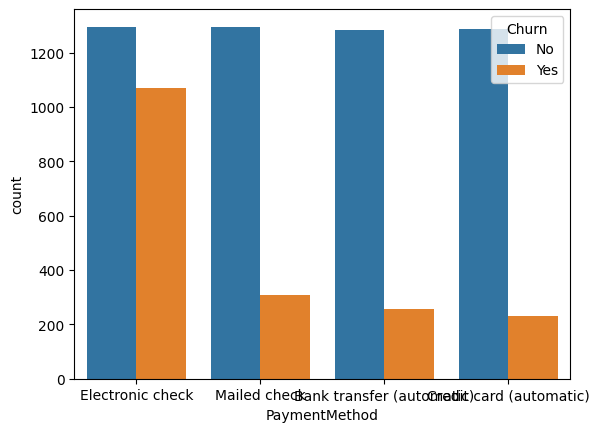

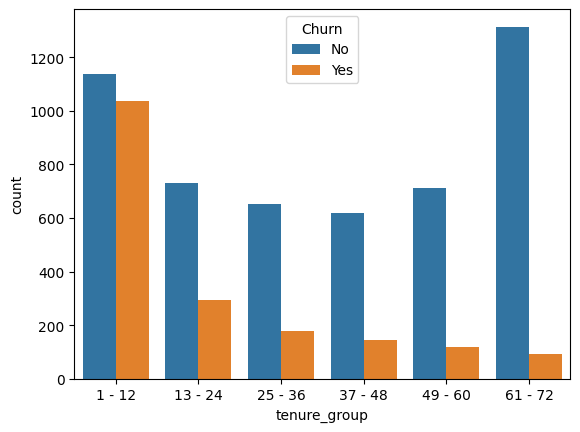

In [17]:
#visual analysis of the data sheet
for i, predictor in enumerate(telco_churn_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_churn_data, x=predictor, hue='Churn')

In [18]:
#now for the beeter outcome and visualizatin we can have some update in the dataset
# Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0

telco_churn_data['Churn'] = np.where(telco_churn_data.Churn == 'Yes',1,0)
telco_churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [19]:
 #Convert all the categorical variables into dummy variables

telco_data_dummies = pd.get_dummies(telco_churn_data)
telco_data_dummies.head()


,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


<ipython-input-20-42ba8f66a3c1>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0) ],
<ipython-input-20-42ba8f66a3c1>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

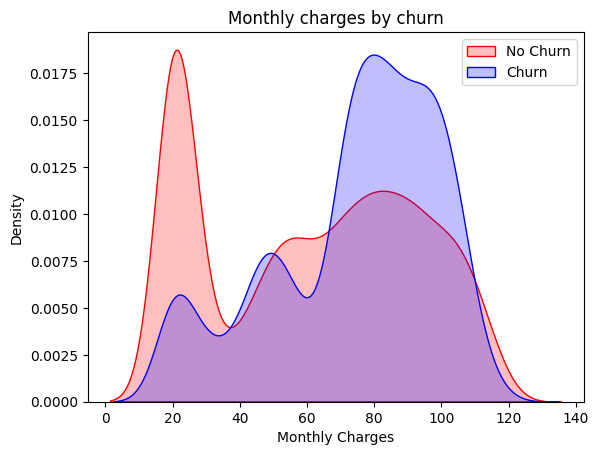

In [20]:
#Churn by Monthly Charges
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')


<ipython-input-21-90842ae2e5a8>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0) ],
<ipython-input-21-90842ae2e5a8>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

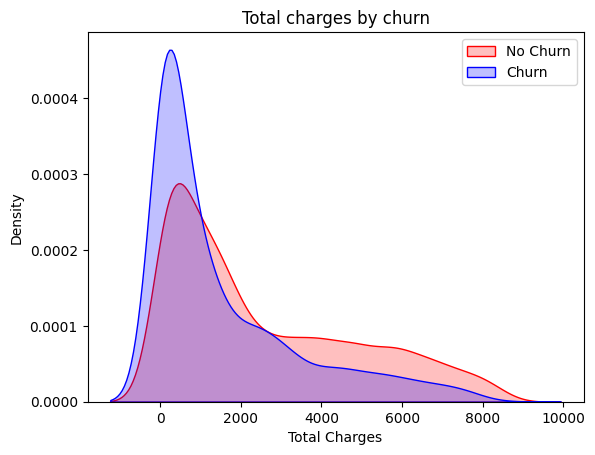

In [21]:
#Churn by total charge
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

In [22]:
new_df1_target0=telco_churn_data.loc[telco_churn_data["Churn"]==0]
new_df1_target1=telco_churn_data.loc[telco_churn_data["Churn"]==1]

In [23]:
def uniplot(df,col,title,hue =None):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30


    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright')

    plt.show()

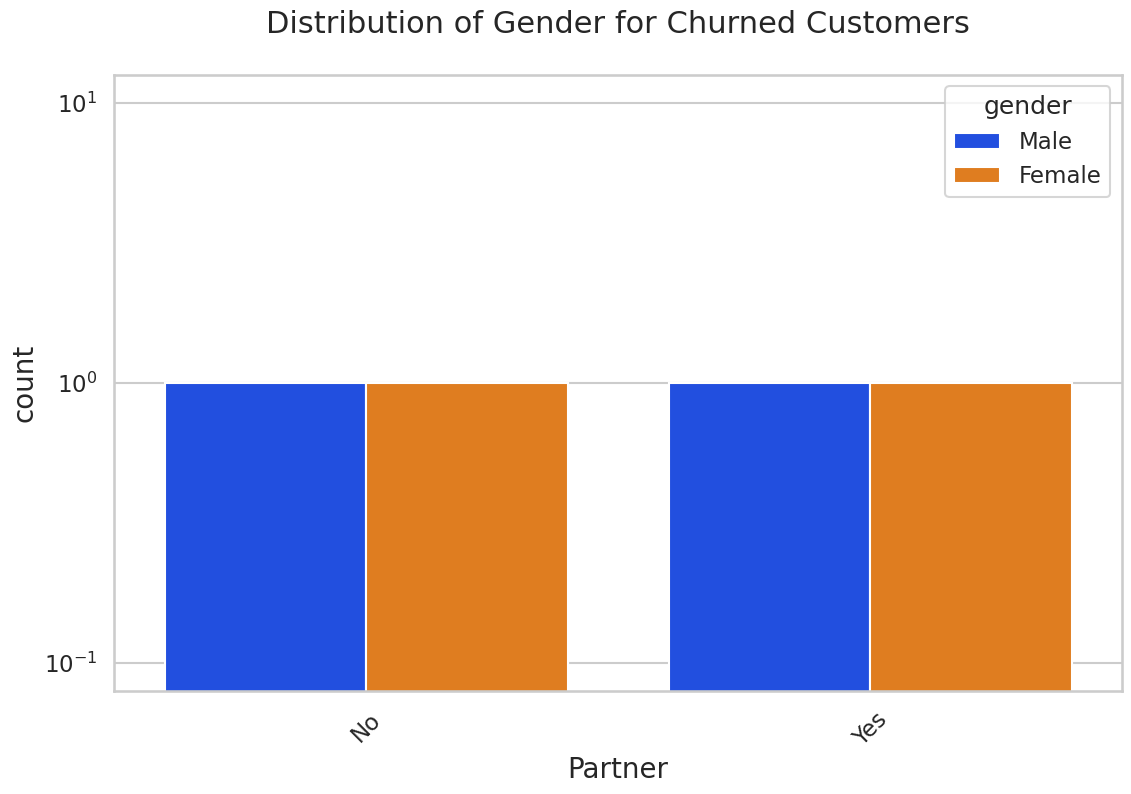

In [24]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

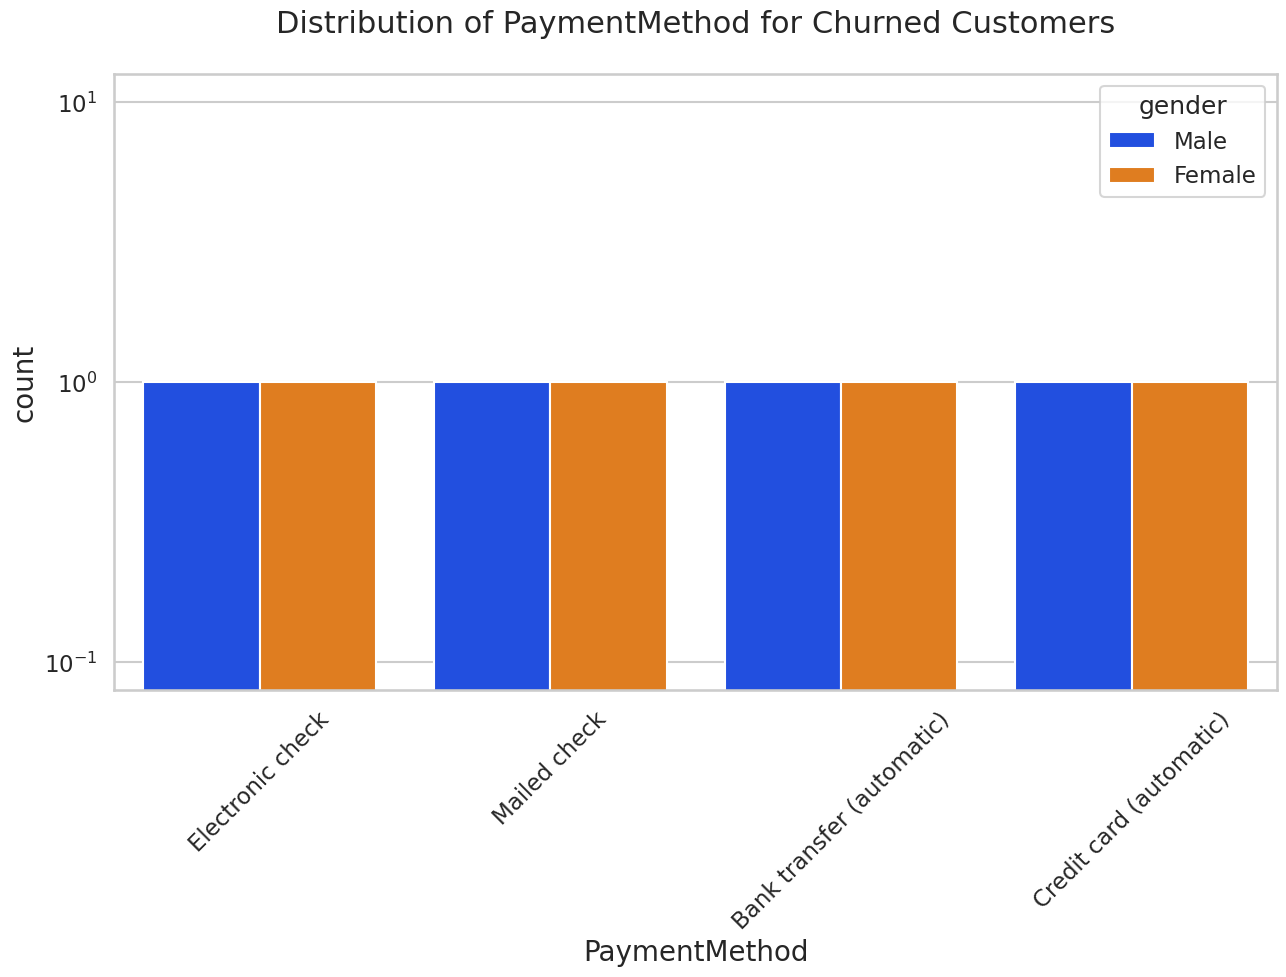

In [25]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

This was all about the EDA some things to remeber for the next prediction part are that Electronic check medium are the highest churners
Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
No Online security, No Tech Support category are high churners
Non senior Citizens are high churner

Now we need to save the dummies to the actual csv file

In [26]:
telco_data_dummies.to_csv('tel_churn.csv')

# Model Selection, Training & Evaluation

In [27]:
df=pd.read_csv("tel_churn.csv")

In [28]:
df.head(5)

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [29]:
df=df.drop('Unnamed: 0',axis=1)

In [30]:
x=df.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [31]:
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

# Train Test Split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Decision Tree Classifier

In [33]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [34]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [35]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [36]:
model_dt.score(x_test,y_test)

0.7903340440653873

In [37]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1017
           1       0.64      0.56      0.60       390

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.78      0.79      0.79      1407



The accuracy is quite low
Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.
Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [38]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)


In [39]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [40]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [41]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9360068259385665
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       520
           1       0.92      0.97      0.94       652

    accuracy                           0.94      1172
   macro avg       0.94      0.93      0.93      1172
weighted avg       0.94      0.94      0.94      1172



In [42]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[467  53]
 [ 22 630]]


the accuracy has now imroved to 98% .

# Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [45]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [46]:
y_pred=model_rf.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 1, 0])

In [47]:
model_rf.score(x_test,y_test)

0.7981520966595593

In [48]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1017
           1       0.69      0.49      0.58       390

    accuracy                           0.80      1407
   macro avg       0.76      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



again here also the accuacy is quite low,so we will use smotten to improve the accuacy of the model

In [49]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [50]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [51]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [52]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [53]:
RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [54]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [55]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [56]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9346904156064462
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       547
           1       0.93      0.95      0.94       632

    accuracy                           0.93      1179
   macro avg       0.94      0.93      0.93      1179
weighted avg       0.93      0.93      0.93      1179



In [57]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[500  47]
 [ 30 602]]


# Performing PCA (Principal Component Analysis) on our model

In [58]:
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train1)
xr_test_pca = pca.transform(xr_test1)
explained_variance = pca.explained_variance_ratio_

In [59]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [60]:
model.fit(xr_train_pca,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [61]:
yr_predict_pca = model.predict(xr_test_pca)

In [62]:
model_score_r_pca = model.score(xr_test_pca, yr_test1)

In [63]:
print(model_score_r_pca)
print(metrics.classification_report(yr_test1, yr_predict_pca))

0.73960983884648
              precision    recall  f1-score   support

           0       0.76      0.64      0.69       547
           1       0.73      0.83      0.77       632

    accuracy                           0.74      1179
   macro avg       0.74      0.73      0.73      1179
weighted avg       0.74      0.74      0.74      1179



the PCA does not give any new output to us and here also the accracy comes out to be low

so we can fizalize the Random Forest Classifier as our final classifer for our model as it gives out the accuracy about 98%

# Deployment Considerations
When deploying applications to cloud platforms, we may need to serialize Python objects for storage, especially if you're using cloud-based storage solutions like object storage services (e.g., Amazon S3, Google Cloud Storage). pickle can be used to serialize objects before storing them in cloud storage and deserialize them when needed.

In [64]:
import pickle

In [65]:
filename = 'CHURNmodel.sav'

In [66]:
pickle.dump(model_rf_smote, open(filename, 'wb'))

In [67]:
load_model = pickle.load(open(filename, 'rb'))

In [68]:
model_score_r1 = load_model.score(xr_test1, yr_test1)

In [69]:
model_score_r1

0.9346904156064462

In [70]:
import os

filename = 'CHURNmodel.sav'
file_path = os.path.join(os.getcwd(), filename)
print("Model file path:", file_path)


Model file path: /content/CHURNmodel.sav


# SUMMARY
Problem Statement: Telecom companies face the challenge of customer churn, where customers switch to competitors or discontinue their services. Identifying potential churners beforehand can help companies take proactive measures to retain customers.

Data Collection and Preparation: Data is collected from various sources such as customer interactions, usage patterns, demographic information, etc. It's then cleaned, preprocessed, and transformed into a format suitable for machine learning algorithms.

Feature Selection: Relevant features related to customer behavior, usage, demographics, and satisfaction are selected for prediction. This may include variables such as call duration, data usage, total harge,contract type, tenure, etc.

Model Selection: Various machine learning algorithms such as decision trees, random forests,  etc., are trained on historical data to predict churn. Ensemble methods like Random Forests  be preferred due to their robustness and ability to handle complex relationships in data.

Model Training: The selected model is trained on a labeled dataset, where historical customer data with churn labels (churned or not churned) is used to train the model.

Model Evaluation: The trained model is evaluated using metrics such as accuracy, precision, recall, F1-score, etc., to assess its performance in predicting churn accurately.

Prediction: Once the model is trained and evaluated, it is deployed to make predictions on new, unseen data. Customer data for current customers is fed into the model, and it predicts the likelihood of churn for each customer.

Actionable Insights: Based on the predictions, the telecom company can take proactive measures to prevent churn. This may include offering discounts, personalized offers, improving customer service, addressing complaints, etc., to retain customers at risk of churn.

Iterative Improvement: The model's performance is monitored over time, and it may be retrained periodically with new data to adapt to changing customer behavior and improve prediction accuracy.

Overall, machine learning for telecom churn prediction enables companies to identify customers at risk of leaving beforehand, allowing them to take targeted actions to retain valuable customers and reduce revenue loss.